# Install package

In [11]:
# ! pip install --quiet vietocr

# Test với pretrain model

In [12]:
import matplotlib.pyplot as plt
from PIL import Image
from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg
config = Cfg.load_config_from_name('vgg_transformer')
config['weights'] = './weights/transformerocr.pth'
config['cnn']['pretrained']=False
config['device'] = 'cuda:0'
detector = Predictor(config)

/home/icnlab/anaconda3/envs/vllm/lib/python3.10/site-packages/vietocr/tool/predictor.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(we

'tan Woon yann.'

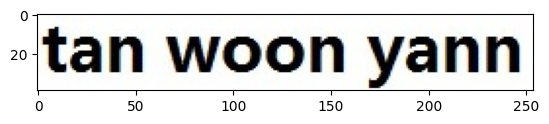

In [13]:
img = '/media/icnlab/Data/Manh/OCR/Documentation/Text_Recognize/invoice_ocr_eng/img_crop/X00016469612_0.jpg'
img = Image.open(img)
plt.imshow(img)
s = detector.predict(img)
s

# Train với Custom Dataset

## Change the config

* *data_root*: the folder save your all images
* *train_annotation*: path to train annotation
* *valid_annotation*: path to valid annotation
* *print_every*: show train loss at every n steps
* *valid_every*: show validation loss at every n steps
* *iters*: number of iteration to train your model
* *export*: export weights to folder that you can use for inference
* *metrics*: number of sample in validation annotation you use for computing full_sequence_accuracy, for large dataset it will take too long, then you can reuduce this number


In [ ]:
from vietocr.tool.config import Cfg
from vietocr.model.trainer import Trainer
config = Cfg.load_config_from_name('vgg_transformer')

dataset_params = {
    'name':'invoice_ocr',
    'data_root':'/media/icnlab/Data/Manh/OCR/invoice/text_recognition/img',
    'train_annotation':'/media/icnlab/Data/Manh/OCR/invoice/text_recognition/text_recognition_train_data.txt',
    'valid_annotation':'/media/icnlab/Data/Manh/OCR/invoice/text_recognition/text_recognition_val_data.txt'
}

params = {
         'print_every':200,
         'valid_every':15*200,
          'iters':20000,
          'checkpoint':'./checkpoint/transformerocr_checkpoint.pth',
          'export':'./weights/transformerocr.pth',
          'metrics': 10000
         }

config['trainer'].update(params)
config['dataset'].update(dataset_params)
config['device'] = 'cuda:0'
# Train với pretrained model
trainer = Trainer(config, pretrained=True)
# Lưu và load config từ file yml
trainer.config.save('weights/config2.yml')
# trainer.visualize_dataset()

In [16]:
### TRAINING ####
trainer.train()

iter: 000200 - train loss: 0.736 - lr: 1.91e-05 - load time: 0.23 - gpu time: 24.15
iter: 000400 - train loss: 0.669 - lr: 3.95e-05 - load time: 0.19 - gpu time: 28.06
iter: 000600 - train loss: 0.641 - lr: 7.14e-05 - load time: 0.34 - gpu time: 34.98
iter: 000800 - train loss: 0.620 - lr: 1.12e-04 - load time: 0.19 - gpu time: 35.84
iter: 001000 - train loss: 0.619 - lr: 1.56e-04 - load time: 0.34 - gpu time: 34.93
iter: 001200 - train loss: 0.619 - lr: 2.01e-04 - load time: 0.19 - gpu time: 35.58
iter: 001400 - train loss: 0.605 - lr: 2.41e-04 - load time: 0.18 - gpu time: 34.64
iter: 001600 - train loss: 0.605 - lr: 2.73e-04 - load time: 0.35 - gpu time: 34.30
iter: 001800 - train loss: 0.607 - lr: 2.93e-04 - load time: 0.20 - gpu time: 34.27
iter: 002000 - train loss: 0.601 - lr: 3.00e-04 - load time: 0.33 - gpu time: 34.20
iter: 002200 - train loss: 0.600 - lr: 3.00e-04 - load time: 0.20 - gpu time: 33.80
iter: 002400 - train loss: 0.600 - lr: 3.00e-04 - load time: 0.33 - gpu time

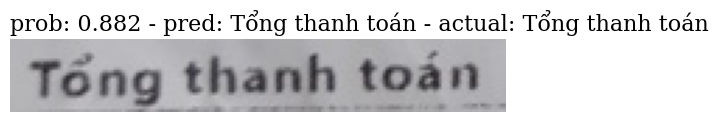

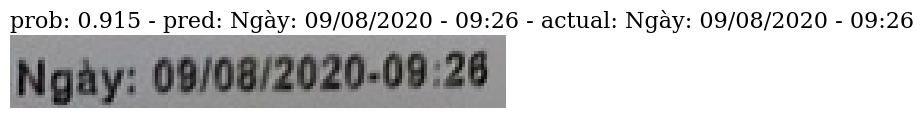

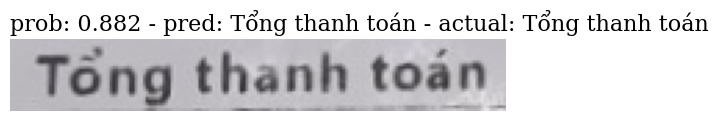

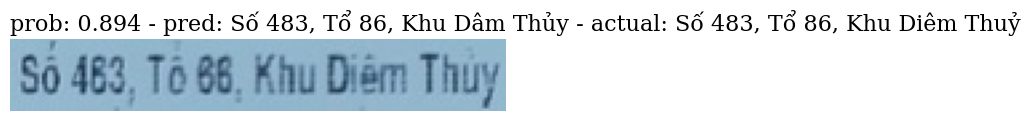

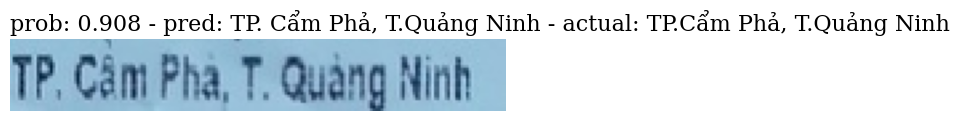

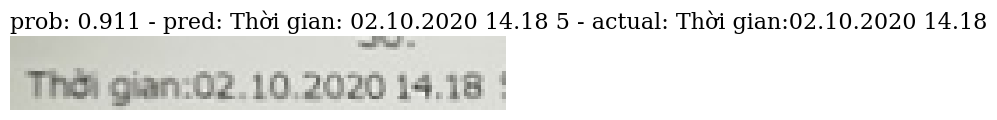

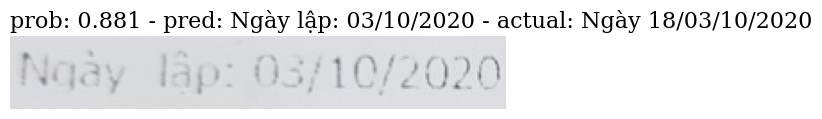

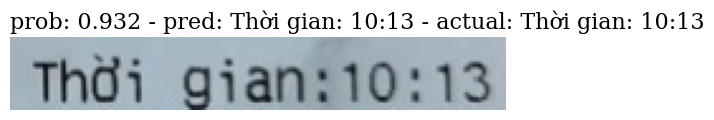

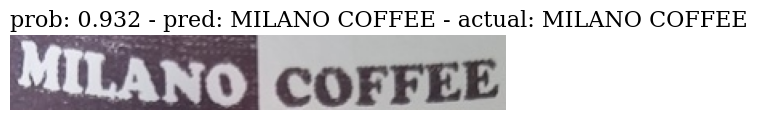

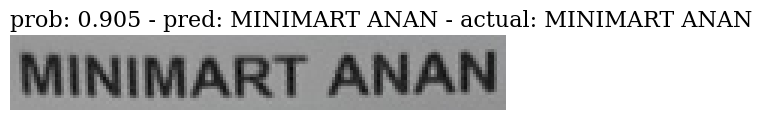

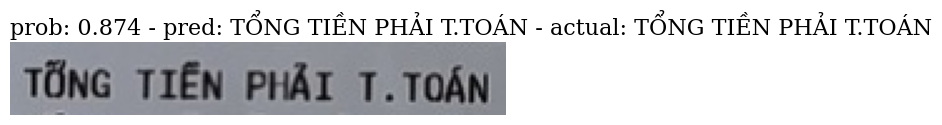

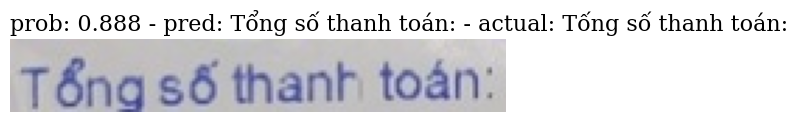

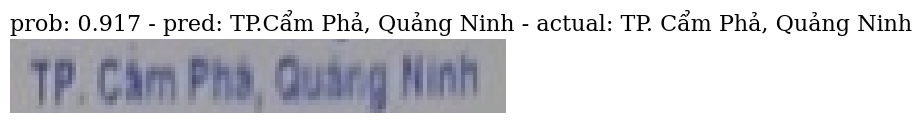

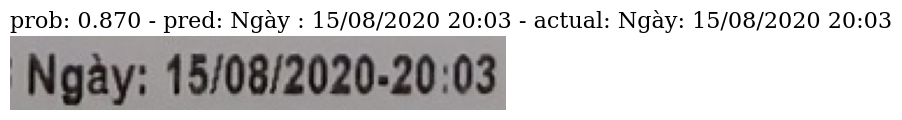

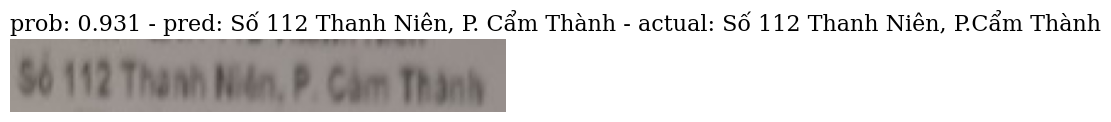

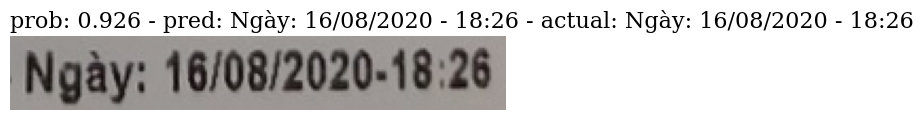

In [17]:
trainer.visualize_prediction()

In [22]:
trainer.precision()

(0.6964285714285714, 0.87172455)

In [28]:
print(config.dump())

AttributeError: 'Cfg' object has no attribute 'dump'

In [24]:
# config = Cfg.load_config_from_name('vgg_transformer')
print(config.dumps())

AttributeError: 'Cfg' object has no attribute 'dumps'

# Load and predict with pretrained model


In [ ]:
! pip install --quiet vietocr

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.9/133.9 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 94.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 23.1 MB/s eta 0:00:00


In [ ]:
%cd /media/icnlab/Data/Manh/OCR/Documentation/Text_Recognize

/media/icnlab/Data/Manh/OCR/Documentation/Text_Recognize


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg
config = Cfg.load_config_from_name('vgg_transformer')
config['weights'] = './weights/transformerocr.pth'
config['cnn']['pretrained']=False
config['device'] = 'cuda:0'
detector = Predictor(config)

In [ ]:
img = Image.open()
s = detector.predict(img)
s

'tan Woon yann.'